<a href="https://colab.research.google.com/github/AmiltonFerreira/airbnb/blob/main/Airbnb_Data_Analysis_Bangkok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://github.com/AmiltonFerreira/data_science/blob/main/banner.png?raw=true">

# Airbnb Data Analysis - *Bangkok, Thailand*
*by Amilton Ferreira, student at* &nbsp;
[<img alt="sigmoidal" width="9%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">](https://sigmoidal.ai)

<br>

Nowadays, when looking for accommodation, [Airbnb](https://www.airbnb.com.br/) is certainly one of the services that comes to mind.

<center><img alt="Analisando Airbnb" width="20%" src="https://news.airbnb.com/wp-content/uploads/sites/4/2020/04/Airbnb_Lockup_Over_Gradient.png"></center>


It works as an online marketplace that allows people to easily rent their homes, or rooms, to guests looking for a short-term rental.

Born in San Francisco, in 2007, Airbnb now has over 4 million Hosts who have welcomed more than 1 billion guest arrivals, in about 100 thousand cities around the world [1].

This innovative business model features hosting a large amount of data. This attracts the interest of researchers, in particular, data scientists, seeking to understand the dynamics involved as well as possible insights that could impact communities.

Within this scope, we will analyze data from the platform's top trending global destination during the year 2022: **Bangkok, Thailand** [2].

<br>

<center><img alt="Bangkok" width="50%" src="https://images.unsplash.com/photo-1531169628939-e84f860fa5d6?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"></center>

The data was obtained from the website [Inside Airbnb](http://insideairbnb.com/get-the-data.html), “a mission driven project that provides data and advocacy about Airbnb's impact on residential communities” [3].

## Obtaining Data


In [2]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

In [3]:
# import the file ".csv" as a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/AmiltonFerreira/airbnb/main/listings.csv')

## Exploratory Data Analysis (EDA)


### **Preview data**

Preliminary Data Processing

At first, we read in our dataset and generate a simple preview and statistics of the data.

In [4]:
# general information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16640 non-null  int64  
 1   name                            16631 non-null  object 
 2   host_id                         16640 non-null  int64  
 3   host_name                       16640 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16640 non-null  object 
 6   latitude                        16640 non-null  float64
 7   longitude                       16640 non-null  float64
 8   room_type                       16640 non-null  object 
 9   price                           16640 non-null  int64  
 10  minimum_nights                  16640 non-null  int64  
 11  number_of_reviews               16640 non-null  int64  
 12  last_review                     

The Data Frame is composed of 16640 entries with 18 attributes (variables).

There are no **non-null** values ​​for **neighbourhood_group** or **license**. So these columns will be discarded when clearing the data.

Also, each attribute has its type, which can be converted according to the necessity of this analysis. 

In [5]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45305964,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,NaN,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,NaN,1,365,0,NaN
1,8975471,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,NaN,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,NaN,1,362,0,NaN
2,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,2020-01-06,0.51,2,362,0,NaN
3,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1405,1,0,NaN,NaN,2,358,0,NaN
4,31508092,Room for rent good and cheap,223483764,Huangseng,NaN,Bang Na,13.66075,100.57991,Private room,700,1,0,NaN,NaN,1,365,0,NaN


In [6]:
# show the last 5 entries
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
16635,39158519,"Impact Apartment, near IMPACT Challenger",260144775,Eve,NaN,Lak Si,13.91114,100.54964,Entire home/apt,680,1,0,NaN,NaN,10,139,0,NaN
16636,30163025,Netipon residence,44921338,Netipon,NaN,Bang Na,13.65453,100.60488,Entire home/apt,499,1,1,2018-12-03,0.02,1,263,0,NaN
16637,14997576,One Bedroom Condo Close to the City and Facili...,94577344,Suchada,NaN,Bang Na,13.65102,100.61308,Entire home/apt,630,7,0,NaN,NaN,2,358,0,NaN
16638,7623057,Affordable 1BedRoom Condo close2BTS,33550104,Kasamsan,NaN,Bang Na,13.65399,100.60605,Entire home/apt,4438,6,78,2020-11-02,0.91,7,364,0,NaN
16639,27847801,Comfy & Clean 1 Bedroom with Pool View at The ...,210308325,Ammy,NaN,Lak Si,13.89610,100.55131,Entire home/apt,750,7,9,2020-01-04,0.18,1,294,0,NaN


The first and last 5 entries confirm that the data is correctly structured in the Data Frame.

**Variables dictionary**

* `id` - identification number generated for the residence
* `name` - advertised residence name
* `host_id` - host (residence owner) identification number
* `host_name` - host name
* `neighbourhood_group` - residence borough
* `neighbourhood` - residence neighbourhood
* `latitude` - residence latitude coordinate
* `longitude` - residence longitude coordinate
* `room_type` - type of room
* `price` - rental price in local currency
* `minimum_nights` - minimum number of nights to book
* `number_of_reviews` - number of reviews the residence has
* `last_review` - date of the last review
* `reviews_per_month` - number of reviews per month
* `calculated_host_listings_count` - number of residences from the same host
* `availability_365` - number of days of availability within 365 days
* `number_of_reviews_ltm` - number of reviews in the last twelve months
* `license` - rental registration number


Before commencing to clean the data, it is good practice to change some of the **types** to better suit the research. So, in this case, **room_type** and **neighbourhood** will be converted to "category", and "last_review" to "datetime".

In [7]:
# set categorical data
df.room_type = df.room_type.astype('category')
df.neighbourhood = df.neighbourhood.astype('category')

# set datetime data
df.last_review = pd.to_datetime(df.last_review)

### Data cleaning



#### Missing values

In [8]:
# variables sorted by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.395012
last_review                       0.395012
name                              0.000541
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

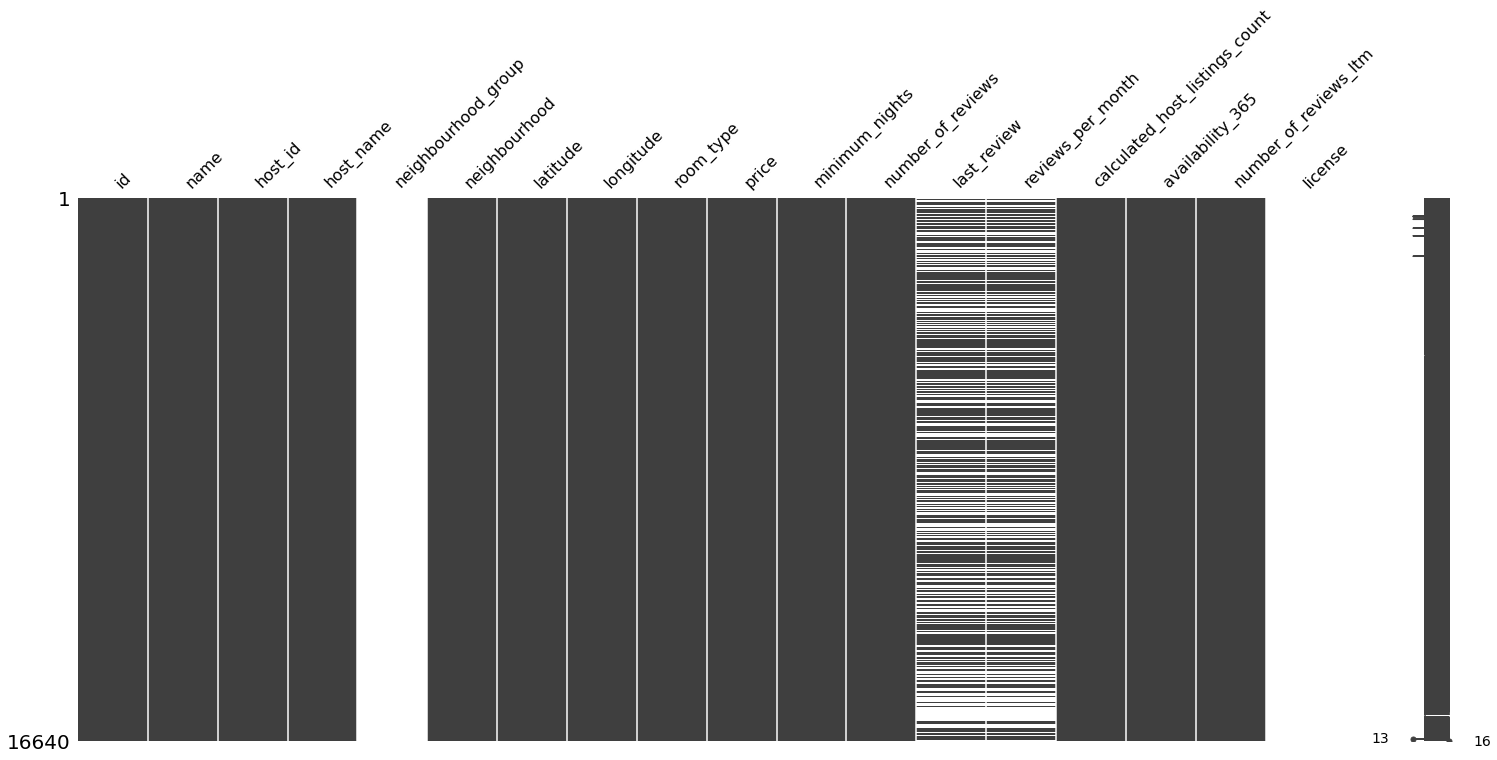

In [9]:
# generate preview of entries with null values
missingno.matrix(df)
plt.show()

Since **license** and **neighbourhood_group** have no valid values, both columns will be discarded.

It is also noticeable that "reviews_per_month" and "last_review" have a large number of null values ​​(almost 40%). However, their entries will remain in the data frame as these two attributes are of minor importance in this analysis.

The **name** variable has a very small amount of null values ​​(0.05%). So, if necessary, the entries could be rejected without too much concern.


In [10]:
df_clean = df.copy(deep=True)

In [11]:
df_clean.drop(['license', 'neighbourhood_group'], inplace=True, axis=1)

#### Duplicated Entries

In [12]:
# check for duplicated entries
df.duplicated().sum()

0

There are no duplicated entries in this Data Frame.

### Categorical Analysis

In this stage the categorical attributes of the Data Frame will be examined: **room type** and **neighbourhood**.


#### Room types

Airbnb hosts can list entire homes/apartments, private, shared rooms, or hotel rooms.

In [13]:
# percentage of each room type
df.room_type.value_counts()/df.shape[0]

Entire home/apt    0.547296
Private room       0.375661
Hotel room         0.043209
Shared room        0.033834
Name: room_type, dtype: float64

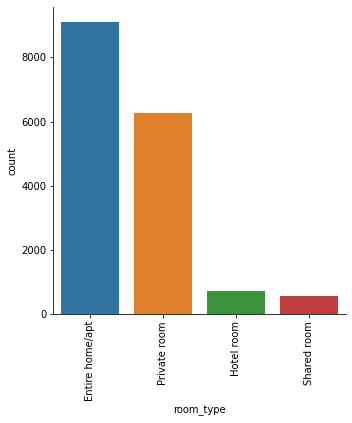

In [14]:
# plot count distribution of categorical data
fig = sns.catplot(x = 'room_type', kind="count", data = df, order = df['room_type'].value_counts().index)
fig.set_xticklabels(rotation=90)
plt.show()

The most common room type for rent is an **entire home or apartment**, followed by **Private room**. **Hotel** and **shared rooms** represent a small part (about 4% each) of the residences offered in Bangkok through Airbnb. 

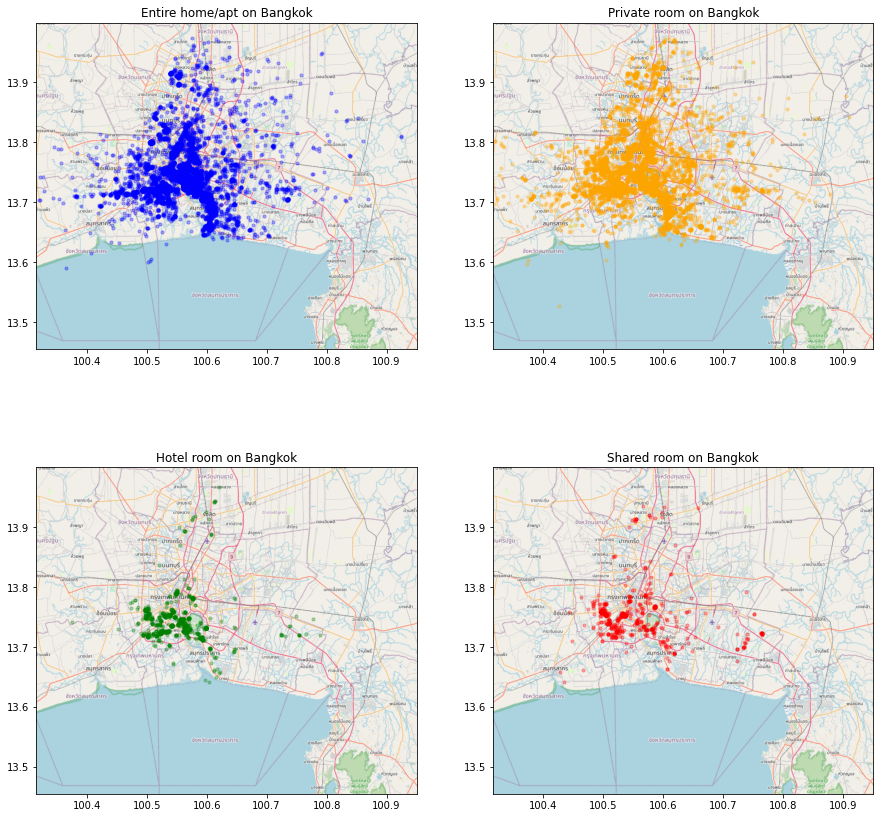

In [15]:
# plot the room types on Bangkok map 

bangkok_map = plt.imread('https://raw.githubusercontent.com/AmiltonFerreira/airbnb/main/map.png')

BBox = (100.3162, 100.9506, 13.4551, 13.9994)

fig, axs = plt.subplots(2, 2, figsize = (15,15))

colors = ['blue', 'orange', 'green', 'red']
i = 0

for ax, room_type in zip(axs.flat, df.room_type.value_counts().iteritems()):
    ax.scatter(df.loc[lambda df: df['room_type'] == room_type[0]].longitude,
               df.loc[lambda df: df['room_type'] == room_type[0]].latitude, zorder=1, alpha= 0.3, c = colors[i], s=10)
    ax.set_title(f'{room_type[0]} on Bangkok')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')
    i += 1


From these plots, it's possible to observe that **entire homes/apts** and **private rooms** are spread all over Bangkok. **Hotels** and **Shared rooms** tend to be concentrated in the central part of the city.

#### Neighbourhoods

In [16]:
# neighbourhoods with more offers
df.neighbourhood.value_counts().head()

Khlong Toei    2101
Vadhana        2093
Ratchathewi    1082
Huai Khwang    1079
Bang Rak        835
Name: neighbourhood, dtype: int64

In [17]:
#neighbourhoods with less offers
df.neighbourhood.value_counts().tail()

Thawi Watthana     29
Bang Khun thain    25
Nong Chok          21
Nong Khaem         16
Bang Bon            4
Name: neighbourhood, dtype: int64

The five neighbourghoods with more offers on the platform were **Khlong Toei**, **Vadhana**, **Ratchathewi**, **Huai Khwang** and **Bang Rak**. On the other hand, the neighbourhoods with less residences announced in Airbnb are **Thawi Watthana**, **Bang Khun thain**, **Nong Chok**, **Nong Khaem** and **Bang Bon**.      

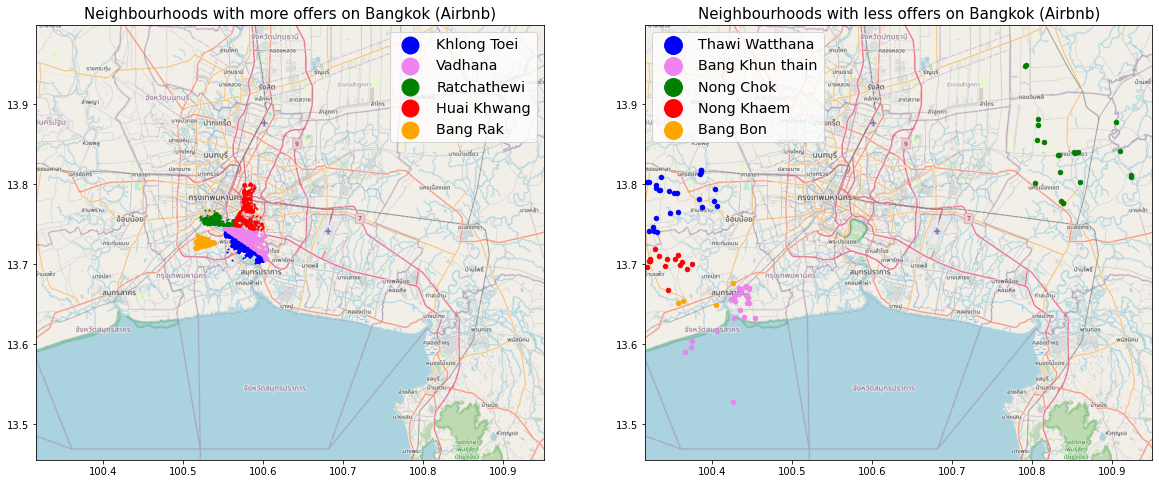

In [42]:
# plot the neighbourhoods with more and less offers on Bangkok map 

fig, axs = plt.subplots(1, 2, figsize = (20,10))

colors = ['blue', 'violet', 'green', 'red', 'orange']
i = 0

for neighbourhood in df.neighbourhood.value_counts().head().iteritems():
    axs[0].scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=1)
    
    i += 1

axs[0].set_title('Neighbourhoods with more offers on Bangkok (Airbnb)', fontsize = 15)
axs[0].legend(fontsize = 'x-large', markerscale = 17)

i = 0

for neighbourhood in df.neighbourhood.value_counts().tail().iteritems():
    axs[1].scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=20)
    
    i += 1

axs[1].set_title('Neighbourhoods with less offers on Bangkok (Airbnb)', fontsize = 15)
axs[1].legend(fontsize = 'x-large', loc = 'upper left', markerscale = 4)

for ax in axs:
  ax.set_xlim(BBox[0],BBox[1])
  ax.set_ylim(BBox[2],BBox[3])
  ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')


The five neighbourghoods with more offers in Airbnb are located in the center area of Bangkok.

### Numeric Analysis

#### Distribution and outliers

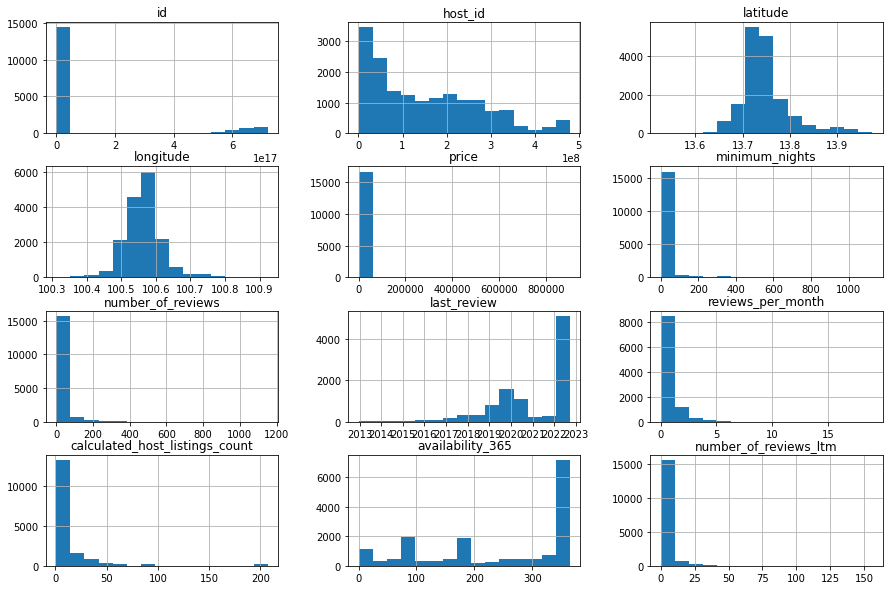

In [18]:
# plot the histogram of the numeric attributes
df_clean.hist(bins=15, figsize=(15,10));

The histograms seem to show the presence of outliers in some attributes like the **price** and **minimum nights**.

One can confirm this hypothesis by the "describe( )" method and by plotting the boxplots.

In [19]:
# summary of the numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16640.000000,16640.000000,16640.000000,10067.000000,16640.000000,16640.000000,16640.000000
mean,2514.712079,15.197055,15.365084,0.658961,12.237500,242.802464,2.160397
std,16154.846054,49.626452,38.541922,0.903555,26.503542,127.908222,6.115644
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,800.000000,1.000000,0.000000,0.080000,1.000000,120.000000,0.000000
50%,1235.500000,1.000000,1.000000,0.320000,4.000000,294.000000,0.000000
75%,2000.000000,7.000000,12.000000,0.920000,11.000000,364.000000,1.000000
max,900000.000000,1125.000000,1151.000000,18.960000,207.000000,365.000000,156.000000


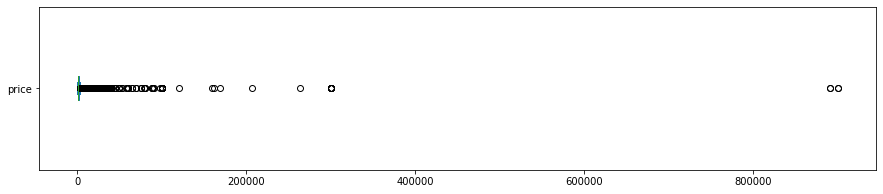


price: values above 8000
496 entradas
2.9808%


In [20]:
# price boxplot
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# amount of entries with price above 8000
print("\nprice: values above 8000")
print("{} entradas".format(len(df[df.price > 8000])))
print("{:.4f}%".format((len(df[df.price > 8000]) / df.shape[0])*100))

The **price** of 8000 proved to be a good threshold to eliminate outliers without losing too many entries (only 3%).

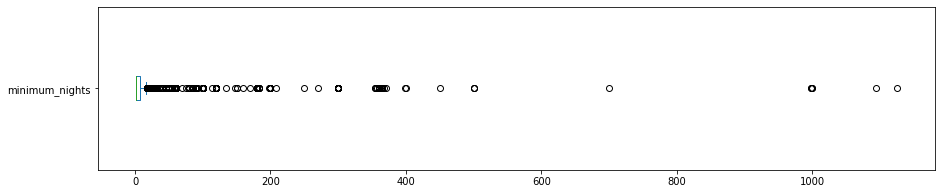


minimum nights: values above 31
887 entradas
5.3305%


In [21]:
# minimum_nights boxplot
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# amount of entries with minimum_nights above 31
print("\nminimum nights: values above 31")
print("{} entradas".format(len(df[df.minimum_nights > 31])))
print("{:.4f}%".format((len(df[df.minimum_nights > 31]) / df.shape[0])*100))

For **minimum nights**, the value of 31 is a good reference to remove the outliers without losing too many entries (only 5.3%).

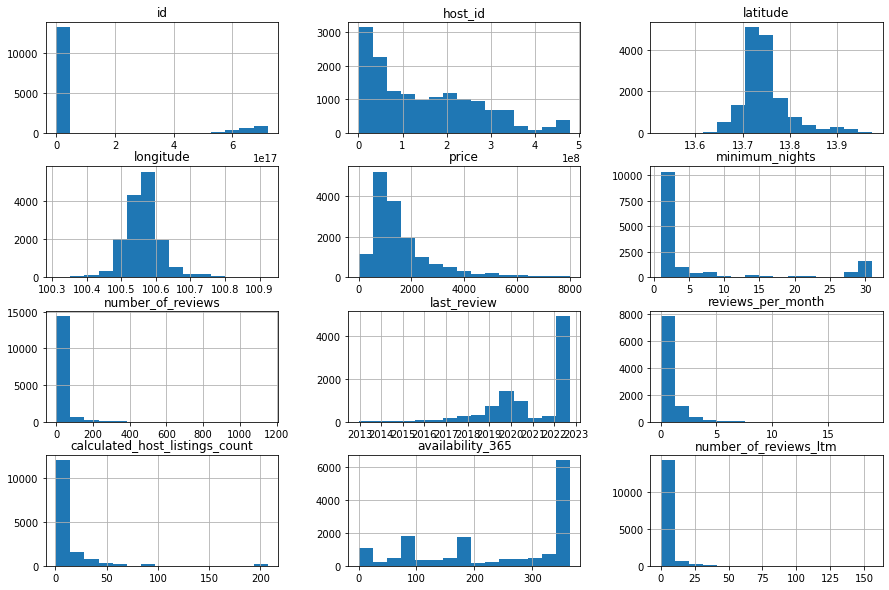

In [22]:
# remover os *outliers* em um novo DataFrame
df_clean.drop(df_clean[df_clean.price > 8000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

#### Prices



In [23]:
# Bangkok median
df_clean.price.median()

1200.0

In [24]:
# Bangkok mean
df_clean.price.mean()

1628.9821475281192

The median price of the homestay in Bangkok is 1200, while the mean price is 1629.

In [25]:
expensive_nbh = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]
expensive_nbh

neighbourhood
Parthum Wan       2296.630319
Taling Chan       2179.274510
Nong Chok         2164.400000
Samphanthawong    2122.918033
Vadhana           2097.607833
Name: price, dtype: float64

The five neighbourhoods with the highest price mean are **Parthum Wan**, **Taling Chan**, **Nong Chok**, **Samphanthawong**, **Vadhana**.

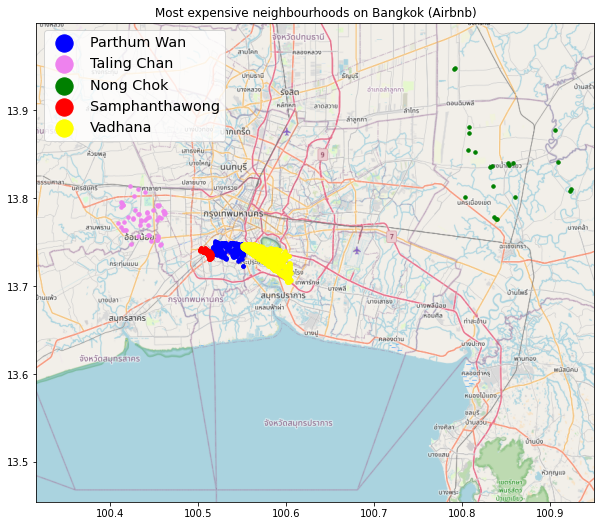

In [26]:
# plot the five neighbourhoods with the highest price mean on Bangkok map 

fig, ax= plt.subplots(figsize = (10,10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in expensive_nbh.iteritems():
    ax.scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=12)
    
    i += 1

ax.set_title('Most expensive neighbourhoods on Bangkok (Airbnb)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(fontsize = 'x-large', markerscale = 5)
ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')

Pathum Wan is known for the shopping district of Siam, one of the best shopping destinations in Southeast Asia, and Ratchaprasong. 

Tailing Chan is composed by many waterways that cross each other. There are about 5 floating markets there and it attracts those porsuing cultural tourism.

Samphanthawong, the Bangkok Chinatown, contains lots of cultural landmarks to be visited.

Vadhana is known as one of Bangkok’s most affluent districts, an excellent place for shopping and nightlife. 

Nong Chok is the biggest and the most sparsely populated district of Bangkok. But it should be noted that it was one of the neighborhoods with the lowest number of advertised rooms. Therefore, its average price may be out of line with the prices actually charged for properties in that district.

In [27]:
cheap_nbh = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:-6:-1]
cheap_nbh

neighbourhood
Phasi Charoen    1083.626582
Min Buri         1148.857143
Lak Si           1174.880734
Bang Phlat       1204.974747
Lat Krabang      1214.018349
Name: price, dtype: float64

The five neighbourhoods with the lowest price mean are **Phasi Charoen**,  **Min Buri**, **Lak Si**, **Bang Phlat**, and **Lat Krabang**.

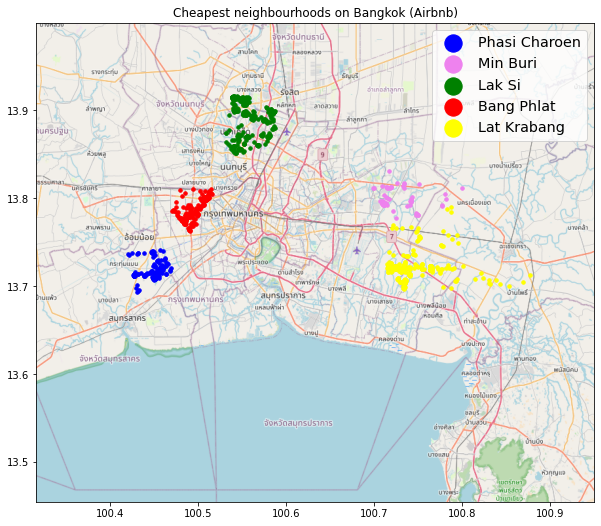

In [28]:
# plot the five neighbourhoods with the lowest price mean on Bangkok map 

fig, ax= plt.subplots(figsize = (10,10))

colors = ['blue', 'violet', 'green', 'red', 'yellow']
i = 0

for neighbourhood in cheap_nbh.iteritems():
    ax.scatter(df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].longitude,
               df.loc[lambda df: df['neighbourhood'] == neighbourhood[0]].latitude,
               label = neighbourhood[0], zorder=1, alpha= 1, c = colors[i], s=12)
    
    i += 1

ax.set_title('Cheapest neighbourhoods on Bangkok (Airbnb)')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.legend(fontsize = 'x-large', markerscale = 5)
ax.imshow(bangkok_map, zorder=0, extent = BBox, aspect= 'equal')

#### Minimum nights

In [29]:
# mean value of minimum_nights
df_clean.minimum_nights.mean()

6.319578864765891

The **minimum nights** mean of all accommodations is 6.4.

In [30]:
df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:5]

room_type
Entire home/apt    8.793822
Private room       3.907611
Hotel room         1.608504
Shared room        1.358047
Name: minimum_nights, dtype: float64

The **room type** has an influence on the **minimum nights** mean. Entire homes/apts have a minimum nights mean of almost 9 nights, while Shared rooms have a mean of 1.3.

#### Correlation between variables

In [31]:
# correlation matrix
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.093949,-0.024678,0.028917,-0.025277,0.039012,-0.006179
minimum_nights,-0.093949,1.000000,-0.028973,-0.125123,-0.063720,-0.103769,-0.088543
number_of_reviews,-0.024678,-0.028973,1.000000,0.654051,0.033999,-0.077580,0.417607
reviews_per_month,0.028917,-0.125123,0.654051,1.000000,0.078254,-0.063774,0.592124
calculated_host_listings_count,-0.025277,-0.063720,0.033999,0.078254,1.000000,-0.009053,0.137547
availability_365,0.039012,-0.103769,-0.077580,-0.063774,-0.009053,1.000000,-0.095643
number_of_reviews_ltm,-0.006179,-0.088543,0.417607,0.592124,0.137547,-0.095643,1.000000


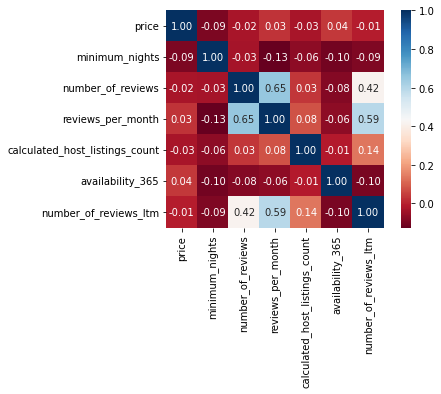

In [32]:
# correlation heatmap
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

The only significative correlations are between the attributes that are related with the reviews. But this doesn't add much to the analysis.

## Conclusion


During this analysis, we were able to identify some of the particularities involving the accommodations announced on Airbnb in the city of Bangkok.

The room types, neighbourhoods, prices, and minimum nights data were inspected and some pieces of information could be obtained.

Entire homes/apartments and private rooms are by far the most common options offered in Airbnb.

The most expensive neighbourhoods certainly have their appeal. It's up to you to choose according to your objectives.

Hosts renting their entire home seek a longer period of contract. If you are looking to stay for a short period, maybe it's not the best option for you.

By the end of the day, after all this research, I'm sure you're ready to spend some days in Bangkok. At least, knowing where to stay won't be an issue.

## References

[1] [https://news.airbnb.com/about-us/](https://news.airbnb.com/about-us/)

[2] [https://news.airbnb.com/cheers-to-2022s-top-destinations-airbnb-shares-its-2023-travel-trends/](https://news.airbnb.com/cheers-to-2022s-top-destinations-airbnb-shares-its-2023-travel-trends/)

[3] [http://insideairbnb.com/about/](http://insideairbnb.com/about/)